In [1]:
import numpy as np
from fish.util.plot import depth_project
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='arial')
matplotlib.rc('font', size=8)
matplotlib.rc('axes', titlesize=8)
matplotlib.rc('axes', labelsize=8)
matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)
matplotlib.rc('legend', fontsize=8)

from skimage.morphology import ball
%matplotlib inline
fig_dir = '../../figures/ch2/'

In [2]:
bll = ball(20).astype('float32')
bll*= (10 + np.random.randn(*bll.shape) / 2)
bz, by, bx = bll.shape

In [3]:
field = np.zeros([3 * bz, by, 3 * bx])
offsets = ((0,0,0), (bz, 0, bx // 2), (2 * bz,  0, bx), (2 * bz, 0, 2 * bx))

for ind_o, o in enumerate(offsets):
    slices = [slice(o[ind], bll.shape[ind] + o[ind]) for ind in range(bll.ndim)]
    field[slices] = bll * (1.5 + ind_o)
field += np.random.randn(*field.shape)

/groups/ahrens/home/bennettd/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


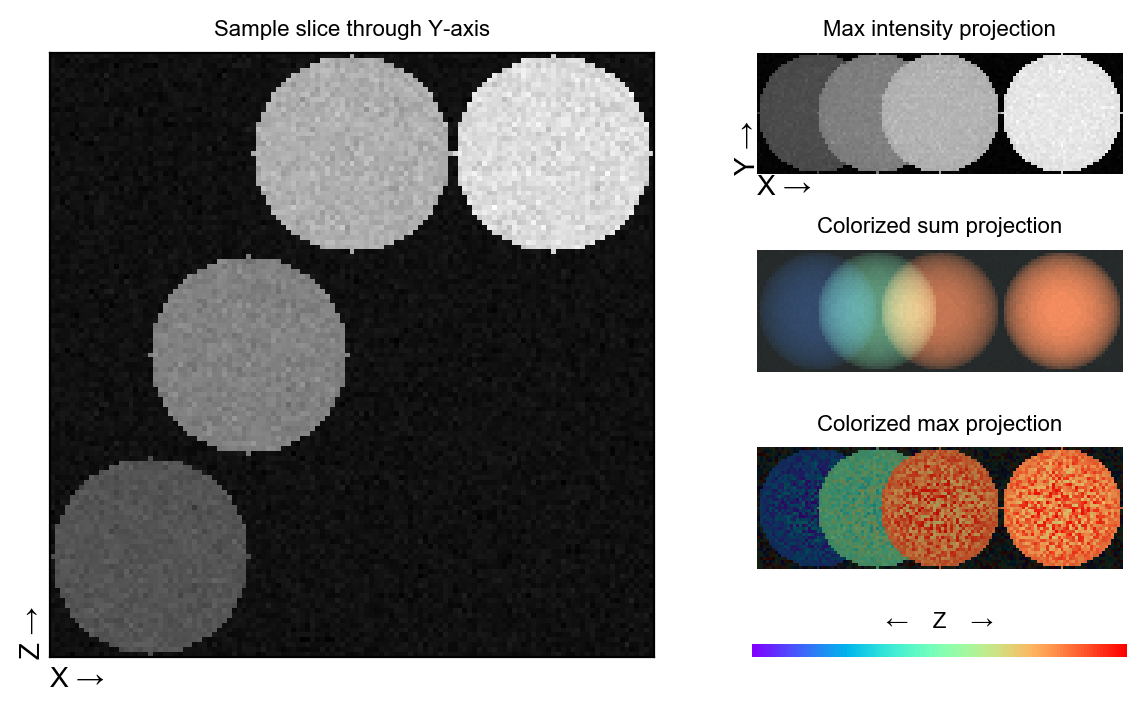

In [4]:
from matplotlib.gridspec import GridSpec as gs
cmap = 'rainbow'
fig = plt.figure(dpi=200, figsize=(8,4))
grid = gs(nrows=4, ncols=2, wspace=-.1, hspace=.8, height_ratios=(1,1,1,.1))
axs_slice = fig.add_subplot(grid[:,0])

axs = [fig.add_subplot(grid[ind, 1]) for ind in range(4)]
axs_slice.imshow(field[:,field.shape[1] // 2,:], origin='lower', cmap='gray')
#axs_slice.axis('off')
axs_slice.set_xticks([])
axs_slice.set_yticks([])

axs_slice.text(-.05, .05, 'Z →', transform=axs_slice.transAxes, rotation=90)
axs_slice.text(0,-.05, 'X →', transform=axs_slice.transAxes)
axs_slice.title.set_text('Sample slice through Y-axis')
axs[0].title.set_text('Max intensity projection')
axs[0].imshow(field.max(0),cmap='gray', origin='lower')
axs[0].text(-.06, 0, 'Y →', transform=axs[0].transAxes, rotation=90, verticalalignment='bottom')
axs[0].text(0, -.22, 'X →', transform=axs[0].transAxes, rotation=0, verticalalignment='bottom')
axs[1].imshow(depth_project(field, cmap=cmap, mode='sum')[:,:,:-1], origin='lower')
axs[1].title.set_text('Colorized sum projection')
axs[2].imshow(depth_project(field, cmap=cmap, mode='max')[:,:,:-1], origin='lower')
axs[2].title.set_text('Colorized max projection')

axs[-1].title.set_text('←    Z    →')
axs[-1].imshow(np.linspace(0,1,field.shape[0]).reshape(-1,1).T, origin='lower', extent=(0, field.shape[0], 0, field.shape[0]//30), cmap=cmap)
[ax.axis('off') for ax in axs]
plt.savefig(fig_dir + 'color_projection_examples.pdf')

In [21]:
from ipyvolume import ipv

In [27]:
from skimage.transform import resize

In [28]:
field.shape

(123, 41, 123)

In [44]:
padded = np.pad(field, ((0,0), (0, 124-41), (0,0)), mode='constant')

In [48]:
ipv.quickvolshow(padded)